## CIFAR-100

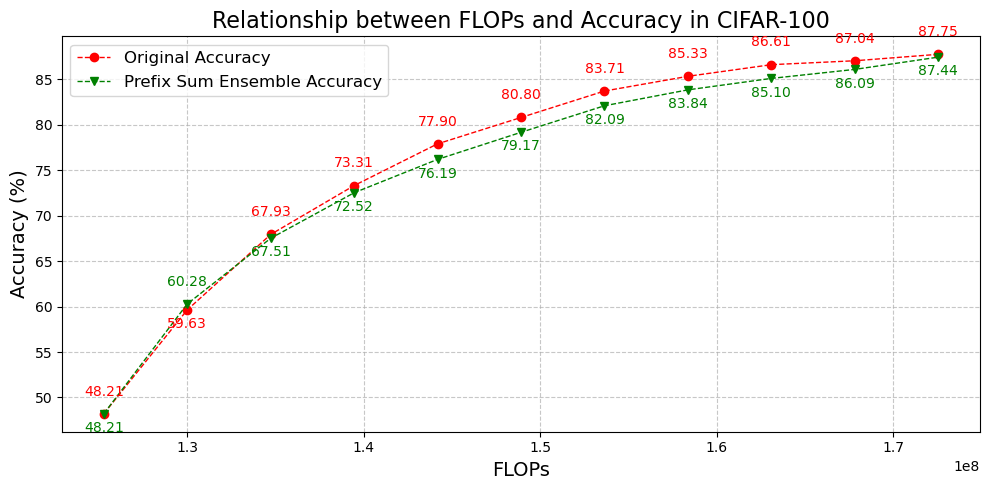

In [127]:
import matplotlib.pyplot as plt

# Data: FLOPs and accuracy
flops_actual = [125285476, 130010980, 134736484, 139461988, 144187492, 148912996, 
                153638500, 158364004, 163089508, 167815012, 172540516]
origin_acc = [48.21, 59.63, 67.93, 73.31, 77.9, 80.8, 83.71, 85.33, 86.61, 87.04, 87.75]
prefix_sum_ensemble_acc = [48.21, 60.28, 67.51, 72.52, 76.19, 79.17, 82.09, 83.84, 85.1, 86.09, 87.44]

# Static ensemble best accuracy
static_ensemble_flops = flops_actual[-1]  # Place at the last FLOPs value
static_ensemble_acc = 88.57  # Best accuracy from static ensemble

# Plot FLOPs vs Accuracy
plt.figure(figsize=(10, 5))

# Plot origin accuracy
plt.plot(flops_actual, origin_acc, marker='o', markersize=6, linestyle='--', linewidth=1, color='red', label="Original Accuracy")
# Add data labels for origin accuracy
offset = 2  # Alternate label positions
text_label_size = 10
for i, (flop, acc) in enumerate(zip(flops_actual, origin_acc)):
    tmp_offset = -1 if i == 1 else 1
    plt.text(flop, acc + offset * tmp_offset, f"{acc:.2f}", fontsize=text_label_size, ha='center', color='red')

# Plot prefix sum ensemble accuracy
plt.plot(flops_actual, prefix_sum_ensemble_acc, marker='v', markersize=6, linestyle='--', linewidth=1, color='green', label="Prefix Sum Ensemble Accuracy")
# Add data labels for prefix sum ensemble accuracy
for i, (flop, acc) in enumerate(zip(flops_actual, prefix_sum_ensemble_acc)):
    tmp_offset = -1 if i == 1 else 1
    plt.text(flop, acc - offset * tmp_offset, f"{acc:.2f}", fontsize=text_label_size, ha='center', color='green')

# # Add static ensemble accuracy as a point
# plt.scatter([static_ensemble_flops], [static_ensemble_acc], color='blue', marker ='o', label="Static Ensemble Best Accuracy", s=30, zorder=5)
# plt.text(static_ensemble_flops, static_ensemble_acc + offset, f"{static_ensemble_acc:.2f}", fontsize=text_label_size, ha='center', color='blue')

# Titles and labels
plt.title("Relationship between FLOPs and Accuracy in CIFAR-100", fontsize=16)
plt.xlabel("FLOPs", fontsize=14)
plt.ylabel("Accuracy (%)", fontsize=14)
plt.legend(fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()

# Show the plot
plt.show()

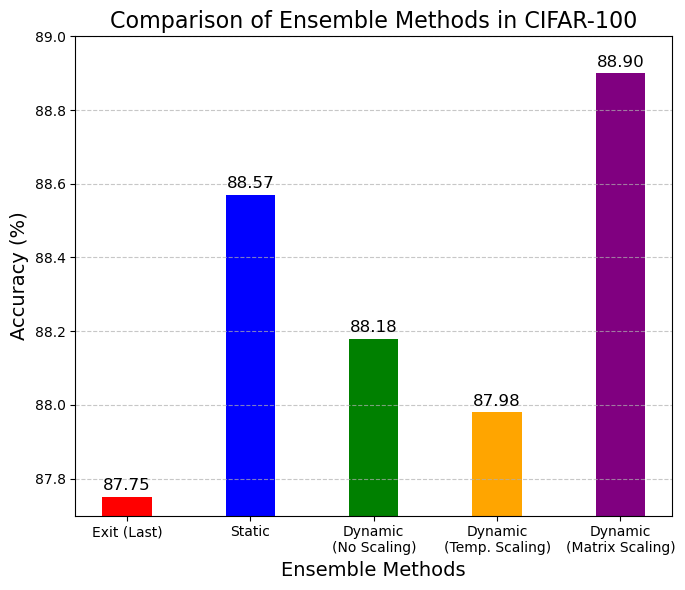

In [138]:
import matplotlib.pyplot as plt

# Data: Ensemble methods and accuracies
methods = [
    'Exit (Last)',
    "Static",
    "Dynamic\n(No Scaling)",
    "Dynamic\n(Temp. Scaling)",
    "Dynamic\n(Matrix Scaling)"
]
accuracies = [87.75, 88.57, 88.18, 87.98, 88.9]

# Plot bar chart
plt.figure(figsize=(7, 6))
bars = plt.bar(methods, accuracies, width=0.4, color=["red", "blue", "green", "orange", "purple"], alpha=1,)

# Add data labels above bars
for bar, acc in zip(bars, accuracies):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 0.01, f"{acc:.2f}", 
             ha='center', va='bottom', fontsize=12, color='black')

# Titles and labels
plt.title("Comparison of Ensemble Methods in CIFAR-100", fontsize=16)
plt.ylabel("Accuracy (%)", fontsize=14)
plt.xlabel("Ensemble Methods", fontsize=14)
plt.ylim(87.70, 89.0)  # Adjust Y-axis limits for better visibility
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Show the plot
plt.tight_layout()
plt.show()

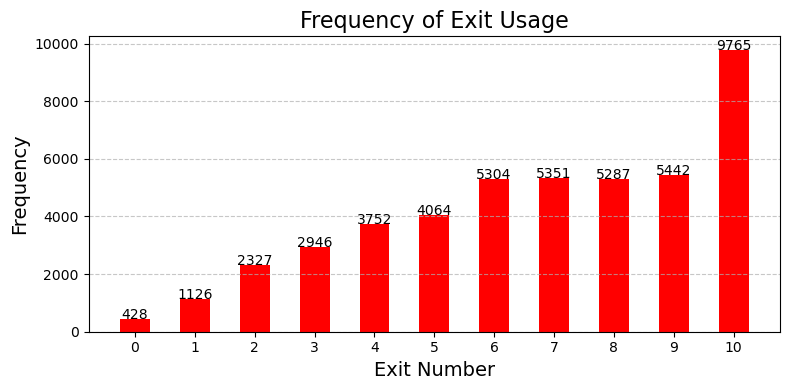

In [144]:
import torch
exits_data  = torch.load(f'choosen_exit_distribution.pt')

exit_ids = range(11)

# 각 출구가 선택된 횟수 계산
exit_counts = [0] * len(exit_ids)
for exits in exits_data:
    for exit_id in exits:
        exit_counts[exit_id] += 1

# 막대 그래프 시각화
plt.figure(figsize=(8, 4))
plt.bar(exit_ids, exit_counts, color='red',  width= 0.5)

# 그래프 제목 및 축 레이블 설정
plt.title("Frequency of Exit Usage", fontsize=16)
plt.xlabel("Exit Number", fontsize=14)
plt.ylabel("Frequency", fontsize=14)

# X축 눈금 설정
plt.xticks(exit_ids)

# 값 레이블 추가
for i, count in enumerate(exit_counts):
    plt.text(i, count + 2, str(count), ha='center', fontsize=10)

# 그래프 표시
plt.tight_layout()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

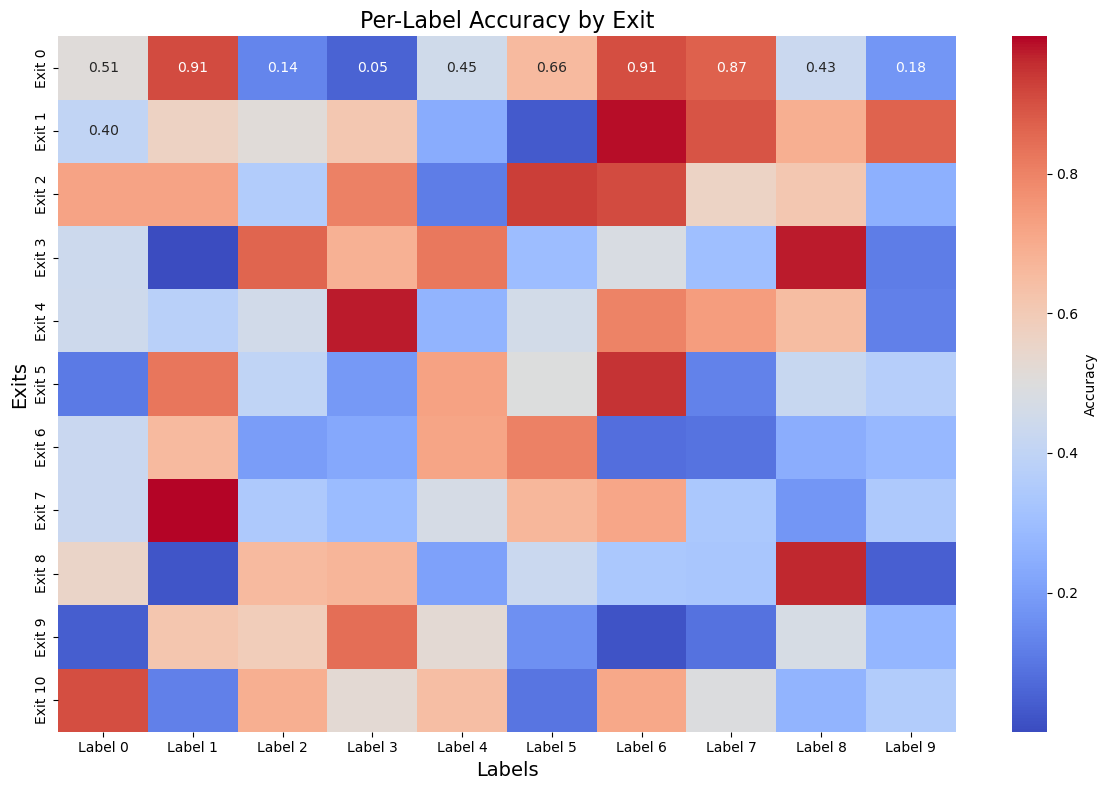

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# 예시 데이터: 출구(0~10) × 라벨(0~9)의 정확도 (0~1 사이 값)
# 실제 데이터로 아래 행렬을 대체하세요.
num_exits = 11  # 출구 개수
num_labels = 10  # 라벨 개수
accuracy_matrix = np.random.rand(num_exits, num_labels)  # 랜덤으로 정확도 생성

# Heatmap 시각화
plt.figure(figsize=(12, 8))
sns.heatmap(
    accuracy_matrix,
    annot=True,           # 셀에 정확도 값 표시
    fmt=".2f",            # 소수점 2자리까지 표시
    cmap="coolwarm",      # 색상 스케일
    cbar_kws={'label': 'Accuracy'},  # 컬러바 레이블
    xticklabels=[f"Label {i}" for i in range(num_labels)],  # X축 라벨
    yticklabels=[f"Exit {i}" for i in range(num_exits)]     # Y축 라벨
)

# 그래프 제목과 축 레이블
plt.title("Per-Label Accuracy by Exit", fontsize=16)
plt.xlabel("Labels", fontsize=14)
plt.ylabel("Exits", fontsize=14)
plt.tight_layout()

# 그래프 출력
plt.show()
 